# Identifying a Signal Source Out of Two Distributions

When we have two signals from two different signal emitters and required to identify stronger one, we usually compute means for each souce's signals. However we need to use limited number of sampling points to take the means because of the limited capacity of a computer. We want to know the accuracy of the identification.

## 1. 課題

When we have two sets of signals
$$
\begin{align*}
x &= [x_0, x_1, ..., x_n] \\
y &= [y_0, y_1, ..., y_n]
\end{align*}
$$
How is it possible to be $\bar{x} \leq \bar{y}$ ?

## 2. 準備

２つの信号源として、以下を作る。

* 信号源 $x$
    * 平均値 $\mu_x$, 分散 $\sigma_x^2$ の正規分布 $N(\mu_x,\sigma_x^2)$
* 信号源 $y$
    * 平均値 $\mu_y$, 分散 $\sigma_y^2$ の正規分布 $N(\mu_y,\sigma_y^2)$


In [1]:
import math
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

Prior probability P(x)=0.5, P(y)=0.5


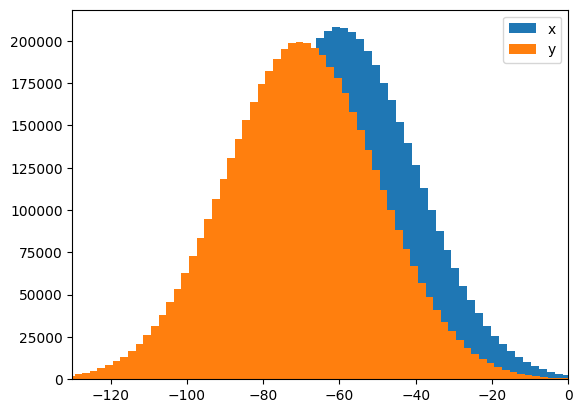

In [2]:
POINTS_X=5000000
POINTS_Y=5000000
mux = -60
sigmax = 20
xs=np.random.normal(loc=mux, scale=sigmax, size=POINTS_X)

muy = -70
sigmay = 20
ys=np.random.normal(loc=muy, scale=sigmay, size=POINTS_Y)

plt.hist(xs,bins=100, label="x")
plt.hist(ys,bins=100, label="y")
plt.legend()
plt.xlim(-130,-0)

Px = len(xs)/(len(xs) + len(ys))
Py = len(ys)/(len(xs) + len(ys))
print(f"Prior probability P(x)={round(Px,3)}, P(y)={round(Py,3)}")

## 3. シミュレーション

信号源 x と y からそれぞれ n 回平均 $\mu_x$, $\mu_y$ を何万回か観測し、
$\mu_x \leq \mu_y$ となる確率 $\rm P(\mu_x \leq \mu_y)$ をシミュレーションして解析を行う。

### 3-1. シミュレーションの実行

In [3]:
n = 40
TRIALS = 100000

def countYisBigger(mux, muy, sigmax, sigmay, sampling_size, trials):
    count_y_is_bigger = 0
    xmeans = np.zeros(trials)
    ymeans = np.zeros(trials)
    for i in range(trials):
        xSampleMean = np.random.normal(loc=mux, scale=sigmax, size=sampling_size).mean()
        ySampleMean = np.random.normal(loc=muy, scale=sigmay, size=sampling_size).mean()
        if(xSampleMean <= ySampleMean):
            count_y_is_bigger = count_y_is_bigger + 1
        xmeans[i] = xSampleMean
        ymeans[i] = ySampleMean
    return count_y_is_bigger, xmeans, ymeans

count_y_is_bigger, xmeans, ymeans = countYisBigger(mux, muy, sigmax, sigmay, n, TRIALS)
print(f"y is bigger {count_y_is_bigger} time(s)")
print(f"P={round(count_y_is_bigger / float(TRIALS),4)}")

y is bigger 1263 time(s)
P=0.0126


$\mu_x \leq \mu_y$ となる確率 $\rm P(\mu_x \leq \mu_y)$ を求めることができた。

### 3-2. 標準エラー

シミュレーションで得られた大量の $\mu_x$ と $\mu_y$ の分散は
標準エラーとして理論値に求めることができる。理論値と一致するか確認を行う。


In [4]:
print("Simulated:")
print(f"E(xavgs)={round(xmeans.mean(),3)}, sigma(xavgs)={round(xmeans.std(),3)}")
print(f"E(yavgs)={round(ymeans.mean(),3)}, sigma(yavgs)={round(ymeans.std(),3)}")

print("Theoretical:")
print(f"sigmax/sqrt(n)={round(sigmax/np.sqrt(n),3)}")
print(f"sigmay/sqrt(n)={round(sigmay/np.sqrt(n),3)}")

Simulated:
E(xavgs)=-59.993, sigma(xavgs)=3.167
E(yavgs)=-70.0, sigma(yavgs)=3.165
Theoretical:
sigmax/sqrt(n)=3.162
sigmay/sqrt(n)=3.162


標準エラーがシミュレーション結果と理論値でほぼ一致していることを確認した。

### 3-3. 分布 y を分布 x に近づけていく


In [5]:
SIM_POINTS = 32
counts_sigma20 = np.zeros(SIM_POINTS)
sigma = 20
muys = np.linspace(mux-10, mux+10, SIM_POINTS)
for i, i_muy in enumerate(muys):
    count, _, _ = countYisBigger(mux, i_muy, sigma, sigma, 40, TRIALS)
    counts_sigma20[i] = count


In [6]:
counts_sigma10 = np.zeros(SIM_POINTS)
sigma = 10
muys = np.linspace(mux-10, mux+10, SIM_POINTS)
for i, i_muy in enumerate(muys):
    count, _, _ = countYisBigger(mux, i_muy, sigma, sigma, 40, TRIALS)
    counts_sigma10[i] = count


In [7]:
counts_sigma5 = np.zeros(SIM_POINTS)
sigma = 5
muys = np.linspace(mux-10, mux+10, SIM_POINTS)
for i, i_muy in enumerate(muys):
    count, _, _ = countYisBigger(mux, i_muy, sigma, sigma, 40, TRIALS)
    counts_sigma5[i] = count


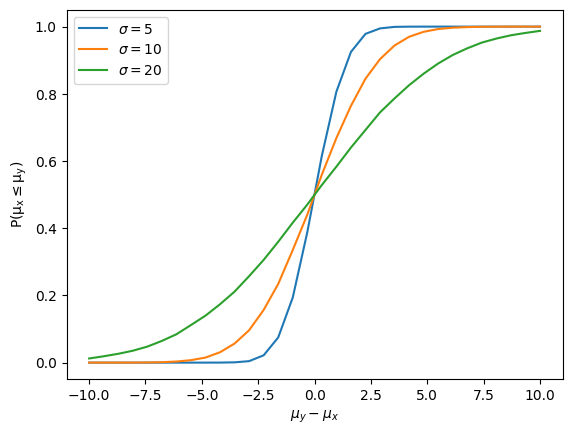

In [8]:
xydiff = muys - (-60)
plt.plot(xydiff, counts_sigma5/TRIALS,  label="$\\sigma=5$")
plt.plot(xydiff, counts_sigma10/TRIALS, label="$\\sigma=10$")
plt.plot(xydiff, counts_sigma20/TRIALS, label="$\\sigma=20$")
plt.legend()
plt.xlabel("$\\mu_y - \\mu_x$")
plt.ylabel("$\\rm{P}(\\mu_x \\leq \\mu_y)$")
plt.show()

* $\mu_y \ll \mu_x$ では　$\rm P(x \leq y) \simeq 0$ である。分布 y の平均値が、分布 x の平均値を大幅に下回っていると、y の n 回平均が x の n 回平均を上回ることは現実的にはない。
* 同様に、$\mu_x \ll \mu_y$ では　$\rm P(x \leq y) \simeq 0$ であり、y の n 回平均が x の n 回平均を毎回確実に上回る。
* $\mu_y - \mu_x$ が 0 であるとき($\mu_y = \mu_x$ であるとき)、 $\rm P(x \leq y)$ は 0.5 である。分布 x と y が重なっていれば、サンプル平均はほぼ同一であり、同一確率で $\mu_x$ が大きいときもあれば、$\mu_y$ が大きいときもある。
* $\sigma$ が小さければ傾きが急激に変化する。

## 4. 理論的に導出してみる

### 4-1. 標本平均の分布

標本平均の分布は n が十分に大きいとき、中心極限定理により、正規分布 $N(\mu, \frac{\sigma^2}{n})$ に従うことが知られている。

このため、 $x \sim N(\mu_x, \sigma_x)$ を、十分多くの回数 n 回観測した標本平均の分布は
$$
\mu_x \sim N(\mu_x, \frac{{\sigma_x}^2}{n})
$$
である。同様に y の場合は、
$$
\mu_x \sim N(\mu_x, \frac{{\sigma_x}^2}{n})
$$
である。

### 4-2. $\mu_x - \mu_y$ の分布

標本平均の分布では、サンプリング毎に取得できる値は $[\mu_{x1}, \mu_{x2}, ...]$ と $[\mu_{y1}, \mu_{y2}, ...]$ である。

$\rm P(\mu_x \leq \mu_y)$ は $\rm P(\mu_x - \mu_y \leq 0)$ と等価であるため、 $\rm P(\mu_x - \mu_y \leq 0)$ の分布を求める。

簡単のために $\mu_x - \mu_y = \delta$ と置きかえると、求める分布は $\rm P(\delta \leq 0)$ である。

#### 平均
$\delta$  の分布の平均は、
$$
\begin{align*}
E(\delta) &= E(\mu_x - \mu_y) \\
&= E(\mu_x) - E(\mu_y) \\
&= \bar{\mu_x} - \bar{\mu_y} \\
\end{align*}
$$
$\bar{\delta}=\bar{\mu_x} - \bar{\mu_y}$ と置いて、$\delta$ の平均は
$$
E(\delta) = \bar{\delta}
$$
と表記することにする。

#### 分散
分散は、
$$
\begin{align*}
Var(\delta) &= Var(\mu_x - \mu_y) \\
&= Var(\mu_x) + Var(\mu_y) \\
& = \sigma_x + \sigma_y
\end{align*}
$$
$\sigma_{\delta} = \sigma_x + \sigma_y$ と置いて、分散を
$$
Var(\delta) = \sigma
$$
と表記することにする。

#### 標準偏差
標本平均を集めたときの標準偏差 $\sigma_z$は、
$$
\begin{align*}
\sigma_{z} &= \sqrt{Var(\mu_x - \mu_y)} \\
&= \sqrt{\sigma_x + \sigma_y} \\
&= \sqrt{\sigma_{\delta}}
\end{align*}
$$
である。

4-3. 標準化

$\rm P(\delta \leq 0)$  を求めるために、$\delta$ を標準化する。
$$
\begin{align*}
Z &= \frac{\delta - E(\delta)}{\sigma_z} \\
&= \frac{\delta - \bar{\delta}}{\sqrt{\sigma_{\delta}}}
\end{align*}
$$

Z の取りうる範囲は、 $\delta \leq 0$ と上式から求められる。
$$
Z \leq \frac{\bar{\delta}}{\sqrt{\sigma_{\delta}}}
$$

よって、求める確率の計算は以下となる。
$$
\rm P(\delta) = \rm P(Z \leq \frac{\bar{\delta}}{\sqrt{\sigma_{\delta}}})
$$

この計算は 標準正規分布の累積分布関数(CDF) $\Phi(z)$ を用いて表される。
$$
\rm P(\delta) = \Phi (\frac{\bar{\delta}}{\sqrt{\sigma_{\delta}}})
$$

$\Phi(z)$ は、解析的に解けないため、近似式を求める方法が何種類か知られている。

## 5. シミュレーションと理論値の比較

前述した標準正規分布からの確率の求め方と、シミュレーション結果を比較して間違いがないか確認を行う。
標準正規分布の累積確率密度の計算は python の組み込み erf 関数を用いた。


Text(0, 0.5, '$\\rm{P}(\\mu_x \\leq \\mu_y)$')

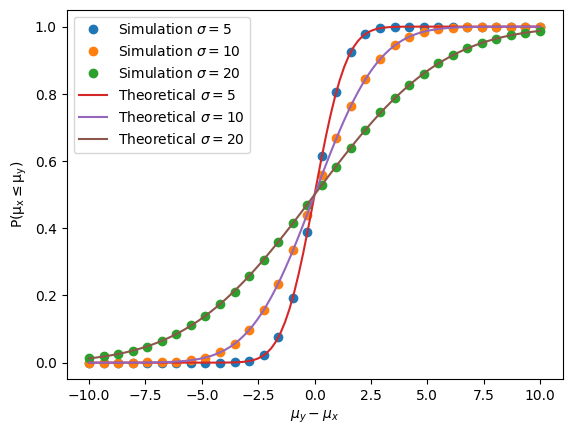

In [9]:
def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

delta = np.linspace(-10, 10, 100)
sigmadelta5  = (5**2 + 5**2)/40
sigmadelta10 = (10**2 + 10**2)/40
sigmadelta20 = (20**2 + 20**2)/40
zs5  = delta / (np.sqrt(sigmadelta5))
zs10 = delta / (np.sqrt(sigmadelta10))
zs20 = delta / (np.sqrt(sigmadelta20))
plt.plot(xydiff, counts_sigma5/TRIALS, "o", label="Simulation $\\sigma=5$", )
plt.plot(xydiff, counts_sigma10/TRIALS,"o", label="Simulation $\\sigma=10$")
plt.plot(xydiff, counts_sigma20/TRIALS,"o", label="Simulation $\\sigma=20$")

p5  = np.zeros(100)
p10 = np.zeros(100)
p20 = np.zeros(100)
for i, i_z in enumerate(zs5):
    p5[i] = phi(i_z)
for i, i_z in enumerate(zs10):
    p10[i] = phi(i_z)
for i, i_z in enumerate(zs20):
    p20[i] = phi(i_z)

plt.plot(delta, p5,  label="Theoretical $\\sigma=5$")
plt.plot(delta, p10, label="Theoretical $\\sigma=10$")
plt.plot(delta, p20, label="Theoretical $\\sigma=20$")

plt.legend()
plt.xlabel("$\\mu_y - \\mu_x$")
plt.ylabel("$\\rm{P}(\\mu_x \\leq \\mu_y)$")

縦軸は $\rm P(x \leq y)$ のままに、横軸を $\frac{\mu_y - \mu_x}{\sigma}$ にすると $\sigma$ の違いがあっても 1 本の線上でシンプルに表現できる。

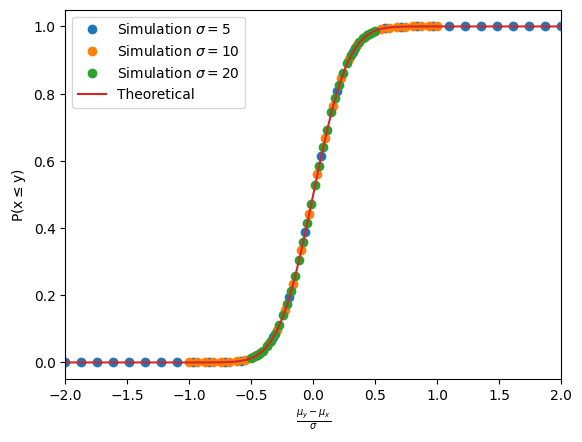

In [10]:
plt.plot(xydiff/5, counts_sigma5/TRIALS,  "o", label="Simulation $\\sigma=5$")
plt.plot(xydiff/10, counts_sigma10/TRIALS, "o", label="Simulation $\\sigma=10$")
plt.plot(xydiff/20, counts_sigma20/TRIALS, "o", label="Simulation $\\sigma=20$")

delta = np.linspace(-2, 2, 100)
sigmadelta10 = (10**2 + 10**2)/40
zs10 = delta / (np.sqrt(sigmadelta10))

p10 = np.zeros(100)
for i, i_z in enumerate(zs10):
    p10[i] = phi(i_z*10)

plt.plot(delta, p10,  label="Theoretical")

plt.legend()
plt.xlabel("$\\frac{\\mu_y - \\mu_x}{\\sigma}$")
plt.ylabel("$\\rm{P}(x \\leq y)$")
plt.xlim(-2,2)
plt.show()

# 6. 近似解

今後、解析的に分析を進めたい場合に、erf 関数を近似できていれば根拠づけが用意になる。

## 6-1. テーラー展開

確率密度関数 $\Phi(z)=\frac{1}{\sqrt{2 \pi}} e^{- \frac{z^2}{2}}$ をテーラー展開で近似してその有用性を確認してみる。
テーラー展開後の式は以下となる。
$$
\Phi(z) \simeq \frac{1}{2} + \frac{1}{\sqrt{2 \pi}} (z - \frac{z^3}{6}+ \frac{z^5}{40} - \frac{z^7}{336}+...)
$$

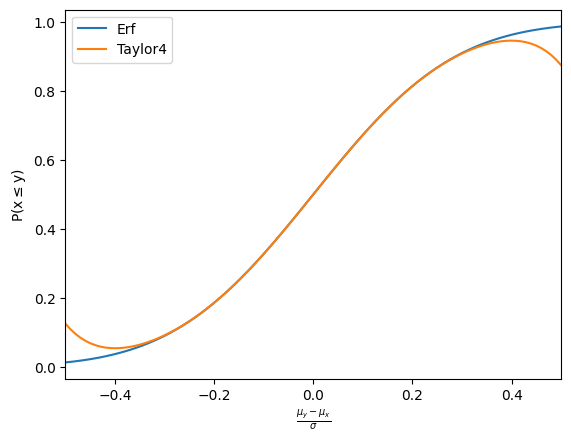

In [11]:
def phi_approx4(z):
    return 0.5 + (1.0/math.sqrt(2.0 * math.pi)) * (z - (z**3)/6.0 + (z**5)/40 - (z**7)/336)

delta = np.linspace(-0.5, 0.5, 100)
sigmadelta10 = (10**2 + 10**2)/40
zs10 = delta / (np.sqrt(sigmadelta10))
p10 = np.zeros(100)
for i, i_z in enumerate(zs10):
    p10[i] = phi(i_z*10)

a10 = np.zeros(100)
for i, i_z in enumerate(zs10):
    a10[i] = phi_approx4(i_z*10)

plt.plot(delta, p10,  label="Erf")
plt.plot(delta, a10,  label="Taylor4")

plt.legend()
plt.xlabel("$\\frac{\\mu_y - \\mu_x}{\\sigma}$")
plt.ylabel("$\\rm{P}(x \\leq y)$")
plt.xlim(-0.5,0.5)
plt.show()

中心付近は良いが、線の立ち上がりを見極めたいときには精度が低い。

## 6-2. Abramowitz and Stegun の式

実用性と精度のバランスが良く、広く使われているという Abramowitz and Stegun の式を用いてみる。

$$
\Phi(z) \simeq 1 - \frac{1}{\sqrt{2 \pi}} { e^{-\frac{z^2}{2}} }(b_1 t + b_2 t^2 + b_3 t^3 + b_4 t^4 + b_5 t^5)
$$

ここで:
* $t = \frac{1}{1+p z}$
* $p = 0.2316419$
* $b_1 = 0.319381530$, $b_2=−0.356563782$, $b3=1.781477937$, $b_4 = -1.821255978$, $b_5=1.330274429$

この式は z が正のときに精度が高いとされるので、z が負のときは以下のように変換して使う。
$$
\Phi(z) = 1-\Phi(-z)
$$


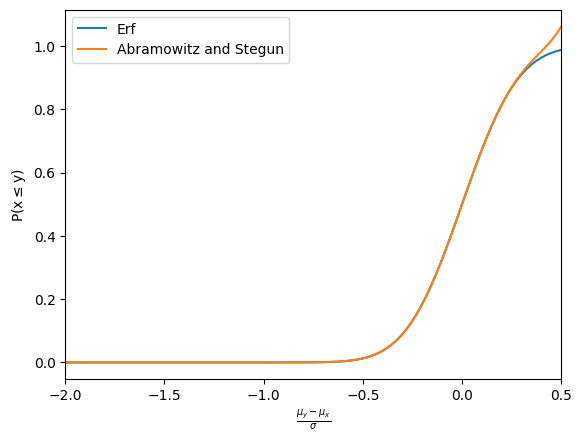

In [12]:
def phi_abst_positive(z):
    p=0.2316419
    b1 = 0.319381530
    b2 =-0.356563782
    b3 = 1.781477937
    b4 =-1.821255978
    b5 = 1.330274429
    t  = 1/(1+p * z)
    return 1-1/(math.sqrt(2 * math.pi)) * math.exp(-(z**2)/2) * (b1*t + b2*(t**2) + b3*(t**3) + b4*(t**4) + b5*(t**5))

def phi_abst_negative(z):
    return 1-phi_abst_positive(-1*z)

delta = np.linspace(-2.0, 0.5, 100)
sigmadelta10 = (10**2 + 10**2)/40
zs10 = delta / (np.sqrt(sigmadelta10))
p10 = np.zeros(100)
for i, i_z in enumerate(zs10):
    p10[i] = phi(i_z*10)

a10 = np.zeros(100)
for i, i_z in enumerate(zs10):
    a10[i] = phi_abst_negative(i_z*10)

plt.plot(delta, p10,  label="Erf")
plt.plot(delta, a10,  label="Abramowitz and Stegun")

plt.legend()
plt.xlabel("$\\frac{\\mu_y - \\mu_x}{\\sigma}$")
plt.ylabel("$\\rm{P}(x \\leq y)$")
plt.xlim(-2,0.5)
plt.show()

## 6-3. Hastings の近似式

計算が簡単だがやや精度が落ちる有名な近似式に Hasting の式がある。
これは Abramowitz and Stegun の 4 乗以降の項を省略したものである。

$$
\Phi(z) \simeq 1 - \frac{1}{\sqrt{2 \pi}} { e^{-\frac{z^2}{2}} }(b_1 t + b_2 t^2 + b_3 t^3)
$$

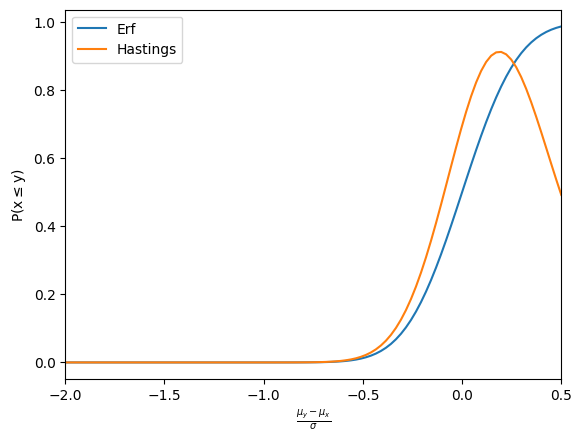

In [13]:
def phi_hastings(z):
    p=0.2316419
    b1 = 0.319381530
    b2 =-0.356563782
    b3 = 1.781477937
    t  = 1/(1+p * z)
    return 1-1/(math.sqrt(2 * math.pi)) * math.exp(-(z**2)/2) * (b1*t + b2*(t**2) + b3*(t**3))

def phi_hastings_negative(z):
    return 1-phi_hastings(-1*z)

delta = np.linspace(-2.0, 0.5, 100)
sigmadelta10 = (10**2 + 10**2)/40
zs10 = delta / (np.sqrt(sigmadelta10))
p10 = np.zeros(100)
for i, i_z in enumerate(zs10):
    p10[i] = phi(i_z*10)

a10 = np.zeros(100)
for i, i_z in enumerate(zs10):
    a10[i] = phi_hastings_negative(i_z*10)

plt.plot(delta, p10,  label="Erf")
plt.plot(delta, a10,  label="Hastings")

plt.legend()
plt.xlabel("$\\frac{\\mu_y - \\mu_x}{\\sigma}$")
plt.ylabel("$\\rm{P}(x \\leq y)$")
plt.xlim(-2.0,0.5)
plt.show()